In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmaps
import plotly.express as px
import json
import plotly.io as pio
import scipy
pio.renderers.default = 'notebook_connected'
# pio.renderers.default = 'chrome'
# !pip install gmaps
# !pip install plotly

# Seedstars IRS Data EDA

#### Let us load the dataset

In [3]:
df = pd.read_csv('seedstar_cleaned_2.csv', encoding='unicode_escape')
df.set_index('company_id',inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(4244, 70)

In [4]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.head().T

company_id,1,2,3,4,5
country,Uzbekistan,China,Mozambique,Argentina,Bangladesh
industry,Consumer Services,Sports,Education,Industrial / Energy / Clean Tech,Education
business_stage,Revenue Stage,Pre-Revenue Stage,Beta Testing Stage,Expansion Stage,Revenue Stage
incorporated,0.0,1.0,1.0,1.0,1.0
incorporation_date,2017.0,2017.0,2015.0,2016.0,2015.0
Age today,36.0,43.0,58.0,54.0,64.0
Number of team members,4.0,7.0,3.0,3.0,2.0
revenue_model_commission,0.0,0.0,0.0,0.0,0.0
revenue_model_product,0.0,1.0,0.0,1.0,0.0
revenue_model_on-demand,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4244 entries, 1 to 4255
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4244 non-null   object 
 1   industry                             4132 non-null   object 
 2   business_stage                       3559 non-null   object 
 3   incorporated                         3560 non-null   float64
 4   incorporation_date                   4244 non-null   float64
 5   Age today                            3689 non-null   float64
 6   Number of team members               4244 non-null   float64
 7   revenue_model_commission             3537 non-null   float64
 8   revenue_model_product                3537 non-null   float64
 9   revenue_model_on-demand              3537 non-null   float64
 10  revenue_model_subscription           3537 non-null   float64
 11  revenue_model_freemium        

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
incorporated,3560.0,0.632865,4.820914e-01,0.0,0.0,1.00,1.00,1.0
incorporation_date,4244.0,2015.774976,2.294184e+00,1970.0,2014.0,2016.00,2017.00,2020.0
Age today,3689.0,54.842776,2.876080e+01,6.0,35.0,51.00,72.00,608.0
Number of team members,4244.0,2.796183,1.747878e+00,1.0,2.0,2.00,3.00,18.0
revenue_model_commission,3537.0,0.286966,4.524097e-01,0.0,0.0,0.00,1.00,1.0
revenue_model_product,3537.0,0.420978,4.937859e-01,0.0,0.0,0.00,1.00,1.0
revenue_model_on-demand,3537.0,0.163415,3.697965e-01,0.0,0.0,0.00,0.00,1.0
revenue_model_subscription,3537.0,0.581284,4.934185e-01,0.0,0.0,1.00,1.00,1.0
revenue_model_freemium,3537.0,0.186599,3.896442e-01,0.0,0.0,0.00,0.00,1.0
revenue_model_advertising,3537.0,0.228159,4.197053e-01,0.0,0.0,0.00,0.00,1.0


# Data Visualization

## Country

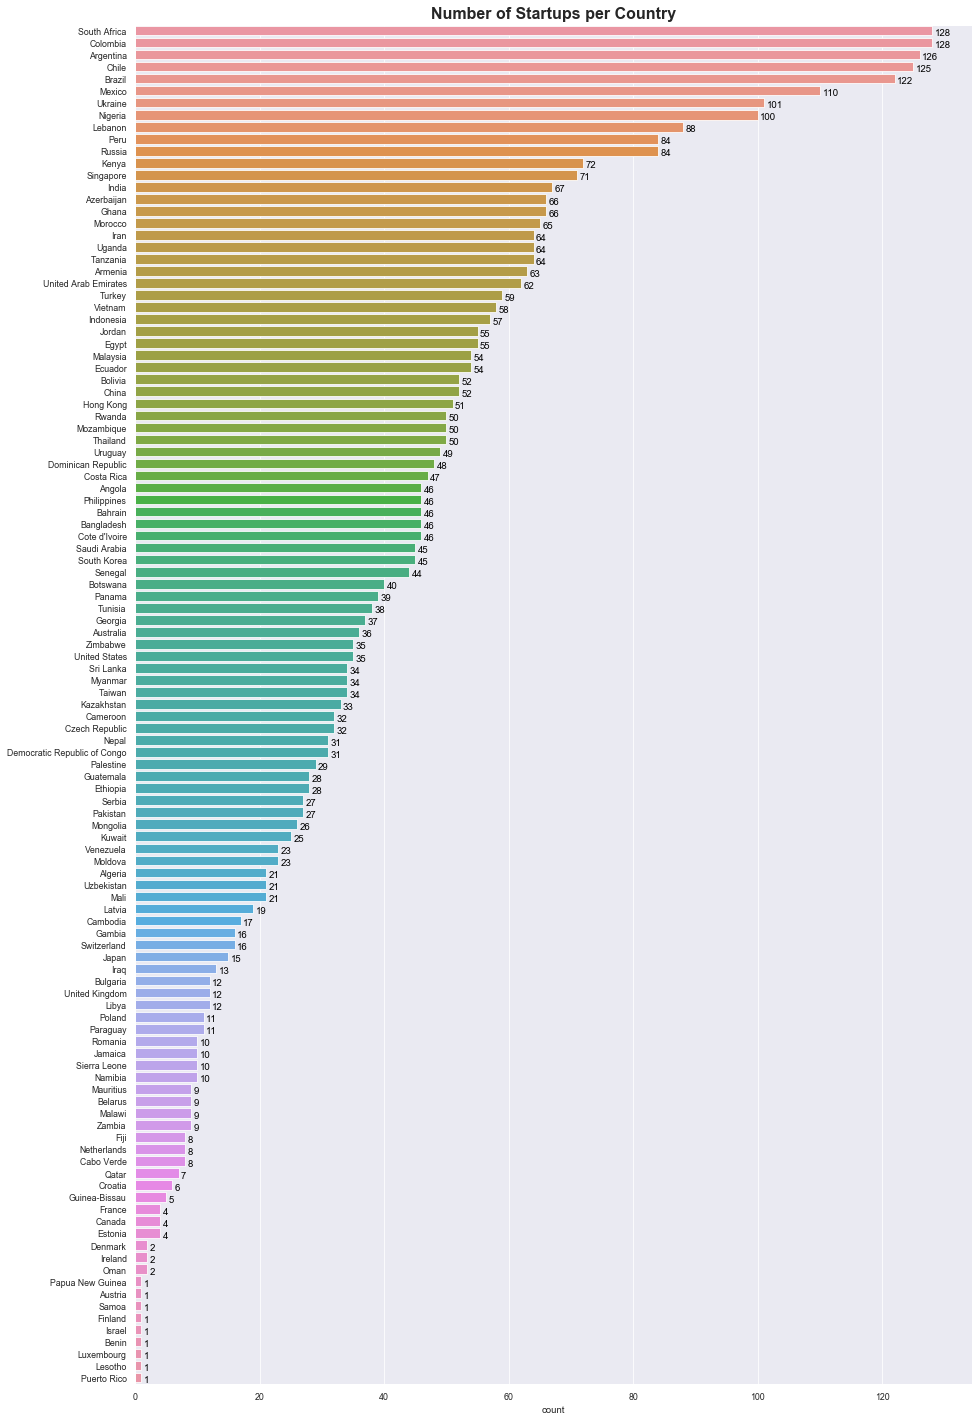

In [399]:
fig, ax = plt.subplots(figsize=(15,25))
sns.countplot(y='country',data=df,ax=ax,order=df.country.value_counts().index)

show_values_on_bars(ax, h_v="h", space=0.4, inte=True)

plt.title('Number of Startups per Country',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

#### Choropleth Map

Below is a sort of heatmap of the startups on the world map

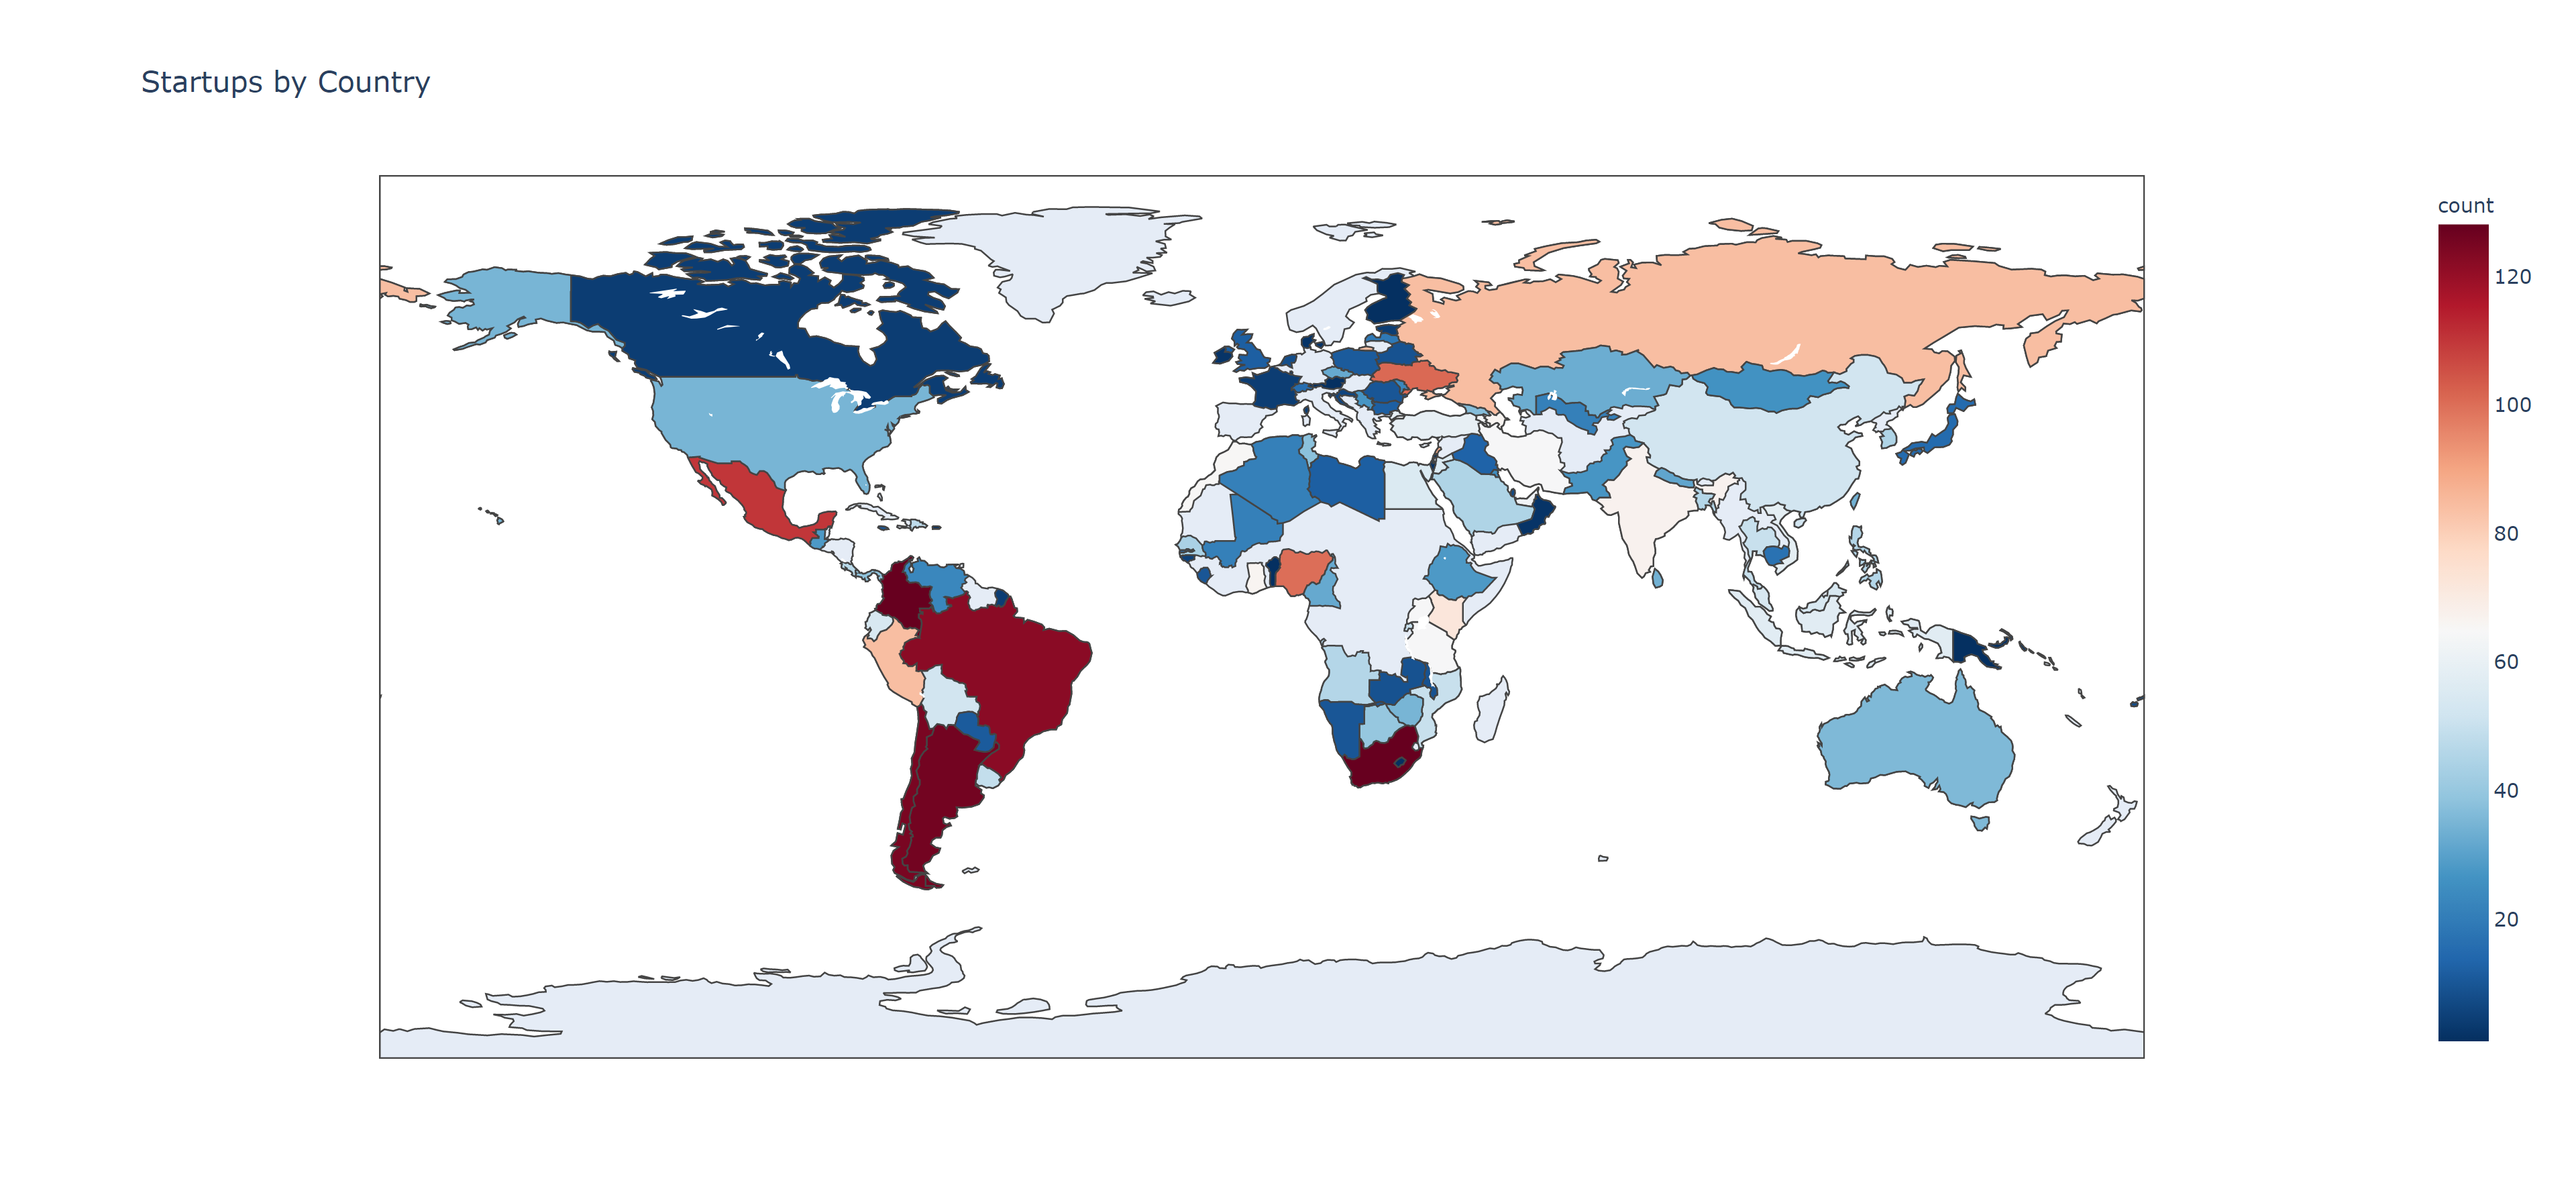

In [8]:
from IPython.display import Image
Image(filename='StartupsbyCountry.png') 

Below is the code for those who are interested :)

In [9]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

Setting up dataframe for data for the map

In [31]:
country = pd.read_csv('country.csv')
country = country.set_index('name')

country_count = pd.DataFrame({'country': df.country.value_counts().index, 'count': df.country.value_counts().values})
country_count.set_index('country',inplace=True)

country_heatmap = country_count.merge(country,left_index=True,right_index=True)
country_heatmap.rename(columns={'country': 'id'},inplace=True)
country_heatmap.reset_index(level=0, inplace=True)
country_heatmap.rename(columns={'index': 'name'},inplace=True)

country_heatmap = country_heatmap[['id', 'name', 'count']]
country_heatmap.iloc[83,0] = 'NA'

Load geojson

In [51]:
world_countries = json.load(open('customhigh.geojson'))

Adding iso alpha code from the geojson file to the dataframe

In [59]:
country_id_map = {}
for feature in world_countries['features']:
    feature['id'] = feature['properties']['iso_a3']
    country_id_map[feature['properties']['iso_a2']] = feature['id']

country_id_map['MU'] = 'MUS'
country_id_map['FR'] = 'FRA'

country_heatmap['iso_alpha'] = country_heatmap['id'].apply(lambda x: country_id_map[x])
country_heatmap.head()

,id,name,count,iso_alpha
0,ZA,South Africa,128,ZAF
1,CO,Colombia,128,COL
2,AR,Argentina,126,ARG
3,CL,Chile,125,CHL
4,BR,Brazil,122,BRA


Interactive map that will open on a new tab :) (just run the cell)

In [60]:
fig = px.choropleth(country_heatmap,
                    locations='iso_alpha',
                    color='count', color_continuous_scale=px.colors.diverging.RdBu_r, title='Startups by Country')
plot(fig)

'temp-plot.html'

<br/>



## Industry

It seems that the top 3 industries that are catagorized are `Consumer Services`, `Financial Services` and `Health / Wellness`

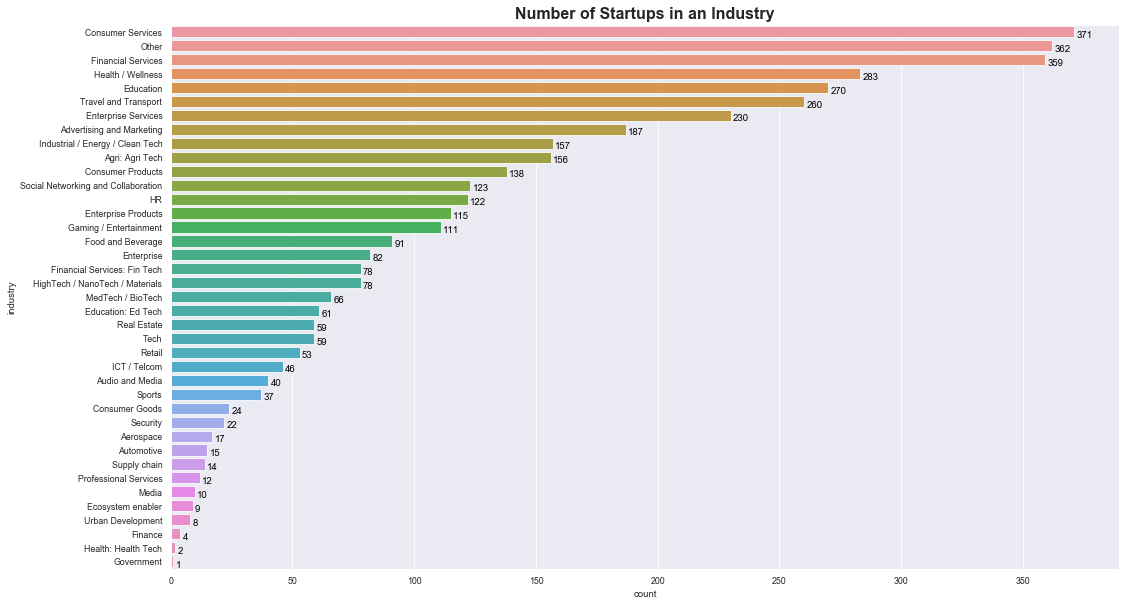

In [405]:
fig, ax = plt.subplots(figsize=(17,10))
ind_count = df['industry'].value_counts().sort_values(ascending=False)
sns.countplot(y='industry',data=df,ax=ax,order=ind_count.index)

show_values_on_bars(ax, h_v="h", space=1, inte=True)

plt.title('Number of Startups in an Industry',fontsize=16, fontweight='bold')
plt.show()

## Growth Rates (Fixed)

#### I feel that this might be an important insight.
We will cover revenue growth, users growth, paying users growth, and number of transactions growth
<br/>
We will segment it by `country` and `industry`

In [135]:
columns = list(df.columns[26:38])

GR_C = pd.DataFrame(df.iloc[:,0:2])
GR_C = GR_C.join(df[columns])

## creating field to check percentage increase in users
def percent_increase_in_revenue(month1,month2,month3):
    avg = ((month2-month1)+(month3-month2))/2
    return avg/(month1+1)*100

GR_C['revenue_g'] = df.apply(lambda row : percent_increase_in_revenue(row['revenue_1month'],row['revenue_2month'],row['revenue_3month']),axis = 1)
GR_C['users_g'] = df.apply(lambda row : percent_increase_in_revenue(row['users_1month'],row['users_2month'],row['users_3month']),axis = 1)
GR_C['paying_users_g'] = df.apply(lambda row : percent_increase_in_revenue(row['paying_users_1month'],row['paying_users_2month'],row['paying_users_3month']),axis = 1)
GR_C['number_transactions_g'] = df.apply(lambda row : percent_increase_in_revenue(row['number_transactions_1month'],row['number_transactions_2month'],row['number_transactions_3month']),axis = 1)

#### Median Revenue Growth by Country (Fixed)

Fixed visualization by removing `0` and `NaN` entries and separating plots into different value ranges

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

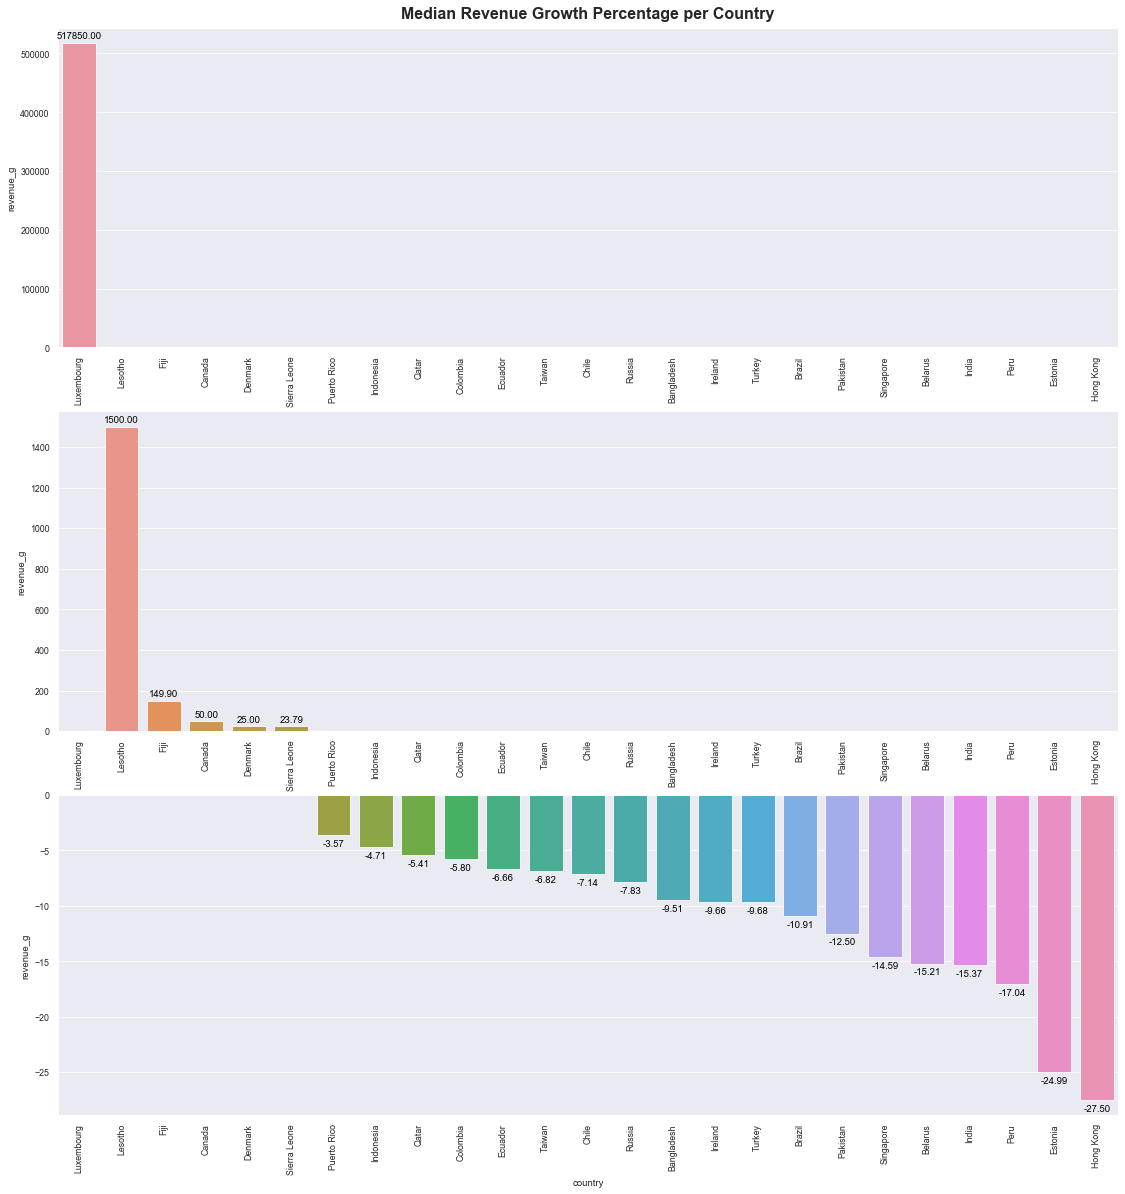

Countries with 0 growth rate:


array(['Myanmar', 'Paraguay', 'Panama', 'Palestine', 'Nigeria',
       'Netherlands', 'Nepal', 'Namibia', 'Morocco', 'Mozambique',
       'Mongolia', 'Moldova', 'Mexico', 'Mauritius', 'Mali', 'Malaysia',
       'Malawi', 'Libya', 'Angola', 'Lebanon', 'Philippines', 'Poland',
       'Kuwait', 'Romania', 'Zambia', 'Vietnam', 'Venezuela',
       'Uzbekistan', 'Uruguay', 'United States', 'United Kingdom',
       'United Arab Emirates', 'Ukraine', 'Uganda', 'Tunisia', 'Thailand',
       'Tanzania', 'Switzerland', 'Sri Lanka', 'South Korea',
       'South Africa', 'Serbia', 'Senegal', 'Saudi Arabia', 'Rwanda',
       'Latvia', 'Algeria', 'Kenya', 'Dominican Republic', 'Kazakhstan',
       'Czech Republic', 'Croatia', "Cote d'Ivoire", 'Costa Rica',
       'China', 'Cameroon', 'Cambodia', 'Cabo Verde', 'Bulgaria',
       'Botswana', 'Bolivia', 'Benin', 'Bahrain', 'Azerbaijan', 'Austria',
       'Australia', 'Armenia', 'Argentina',
       'Democratic Republic of Congo', 'Zimbabwe', 'Ghana', 'Ge

In [366]:
fig, ax = plt.subplots(3,1,figsize=(19,20),sharex=False)

result = GR_C.groupby(['country'])['revenue_g'].aggregate(np.median).reset_index().sort_values('revenue_g',ascending=False).dropna()
result0 = result[result['revenue_g'] == 0] 
result = result[result['revenue_g'] != 0]
res0 = result[0:1]
res1 = result[1:6]
res2 = result[6:-2]

sns.barplot(x=res0['country'], y=res0['revenue_g'], order=result['country'][:-2],ax=ax[0])
sns.barplot(x=res1['country'], y=res1['revenue_g'], order=result['country'][:-2],ax=ax[1])
sns.barplot(x=res2['country'], y=res2['revenue_g'], order=result['country'][:-2],ax=ax[2])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.axes[0].title.set_text('Median Revenue Growth Percentage per Country')
fig.axes[0].title.set_size(16)
fig.axes[0].title.set_weight('bold')
fig.axes[0].title.set_y(1.01)

show_values_on_bars(fig.axes[0], h_v="v", space=8000, inte=False)
show_values_on_bars(fig.axes[1], h_v="v", space=20, inte=False)
show_values_on_bars(fig.axes[2], h_v="v", space=-1, inte=False)

plt.show()

print('Countries with 0 growth rate:')
np.array(result0['country'])

In [134]:
# result = GR_C.groupby(['country'])['revenue_g'].aggregate(np.median).reset_index().sort_values('revenue_g',ascending=False)
# result = result[result['revenue_g'] != 0][2:]

# sns.set_palette('colorblind')
# sns.set_style('darkgrid')

# g = sns.catplot(data=result,kind='bar',x='country',y='revenue_g',order=result['country'], estimator=np.median)
# g.fig.set_size_inches(19,5)
# g.fig.subplots_adjust(top=0.90)
# g.fig.suptitle('Median Revenue Growth Percentage per Country', fontsize=16, x=0.55)

# plt.xticks(rotation=90)
# plt.ylabel('Percentage(%)')
# plt.show()

#### Median Revenue Growth by Industry

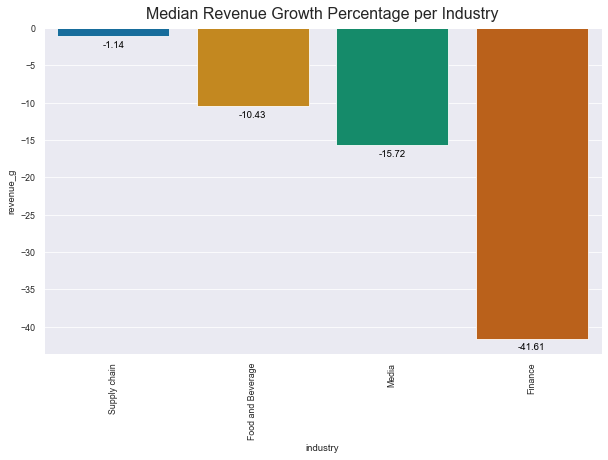

Industries with 0 growth rate:


array(['Advertising and Marketing', 'Aerospace', 'Health / Wellness',
       'Health: Health Tech', 'HighTech / NanoTech / Materials',
       'ICT / Telcom', 'Industrial / Energy / Clean Tech',
       'MedTech / BioTech', 'Other', 'Professional Services',
       'Real Estate', 'Retail', 'Security',
       'Social Networking and Collaboration', 'Sports', 'Tech',
       'Travel and Transport', 'HR', 'Government',
       'Gaming / Entertainment', 'Education: Ed Tech', 'Agri: Agri Tech',
       'Audio and Media', 'Automotive', 'Consumer Goods',
       'Consumer Products', 'Consumer Services', 'Ecosystem enabler',
       'Education', 'Enterprise', 'Enterprise Products',
       'Enterprise Services', 'Financial Services',
       'Financial Services: Fin Tech', 'Urban Development'], dtype=object)

In [403]:
fig, ax = plt.subplots(figsize=(10,6),sharex=False)

result = GR_C.groupby(['industry'])['revenue_g'].aggregate(np.median).reset_index().sort_values('revenue_g',ascending=False).dropna()
result0 = result[result['revenue_g'] == 0]
result = result[result['revenue_g'] != 0]
res0 = result[0:1]
res1 = result[1:6]
res2 = result[6:-2]

sns.barplot(x=result['industry'], y=result['revenue_g'], order=result['industry'][:],ax=ax)

# for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=90)

# fig.axes[0].title.set_text('Median Revenue Growth Percentage per Industry')
# fig.axes[0].title.set_size(16)

plt.title('Median Revenue Growth Percentage per Industry',fontsize=16,y=1.01)
plt.xticks(rotation=90)

show_values_on_bars(ax, h_v="v", space=-1.5, inte=False)

plt.show()

print('Industries with 0 growth rate:')
np.array(result0['industry'])

In [144]:
# result = GR_C.groupby(['industry'])['revenue_g'].aggregate(np.median).reset_index().sort_values('revenue_g',ascending=False)



# g = sns.catplot(data=result,kind='bar',x='industry',y='revenue_g',order=result['industry'], estimator=np.median)
# g.fig.set_size_inches(17,5)
# g.fig.subplots_adjust(top=0.90)
# g.fig.suptitle('Median Revenue Growth Percentage per industry', fontsize=16, x=0.55)

# plt.xticks(rotation=90)
# plt.ylabel('Percentage(%)')
# plt.show()

#### Median User Growth by Country

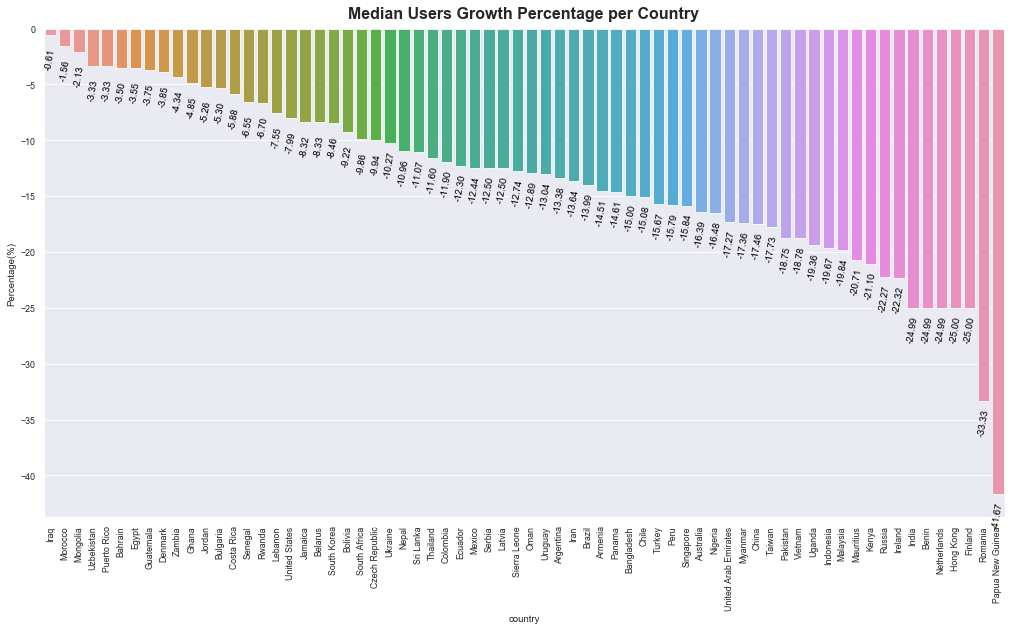

Countries with 0 growth rate:


array(['Algeria', 'Estonia', 'Fiji', 'France', 'Gambia', 'Georgia',
       'Guinea-Bissau', 'Israel', 'Kazakhstan', 'Kuwait', 'Angola',
       'Libya', 'Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mozambique',
       'Namibia', 'Palestine', 'Paraguay', 'Philippines', 'Poland',
       'Qatar', 'Saudi Arabia', 'Switzerland', 'Tanzania', 'Tunisia',
       'United Kingdom', 'Venezuela', 'Ethiopia', 'Lesotho', 'Zimbabwe',
       'Canada', "Cote d'Ivoire", 'Cambodia', 'Cabo Verde', 'Botswana',
       'Croatia', 'Azerbaijan', 'Democratic Republic of Congo', 'Austria',
       'Dominican Republic', 'Cameroon'], dtype=object)

In [396]:
result = GR_C.groupby(['country'])['users_g'].aggregate(np.median).reset_index().sort_values('users_g',ascending=False).dropna()
result0 = result[result['users_g'] == 0]
result = result[result['users_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='country',y='users_g',order=result['country'], estimator=np.median)
g.fig.set_size_inches(18,8)
# g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Users Growth Percentage per Country', fontsize=16, y=1, x=0.5, fontweight='bold')

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-3, inte=False,rotation=80)

plt.show()

print('Countries with 0 growth rate:')
np.array(result0['country'])

#### Median User Growth by Industry

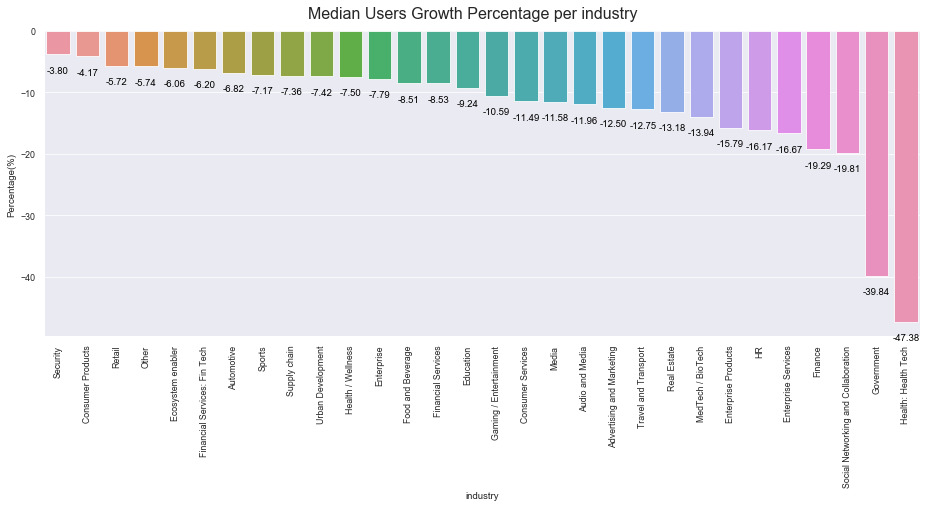

Industries with 0 growth rate:


array(['ICT / Telcom', 'Aerospace', 'Agri: Agri Tech',
       'Professional Services', 'Tech', 'Consumer Goods',
       'HighTech / NanoTech / Materials',
       'Industrial / Energy / Clean Tech', 'Education: Ed Tech'],
      dtype=object)

In [407]:
result = GR_C.groupby(['industry'])['users_g'].aggregate(np.median).reset_index().sort_values('users_g',ascending=False).fillna(0)
result0 = result[result['users_g'] == 0]
result = result[result['users_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='industry',y='users_g',order=result['industry'], estimator=np.median)
g.fig.set_size_inches(17,5)
# g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Users Growth Percentage per industry', fontsize=16,y=1.03, x=0.48)

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-3, inte=False)

plt.show()

print('Industries with 0 growth rate:')
np.array(result0['industry'])

#### Median Paying User Growth by Country

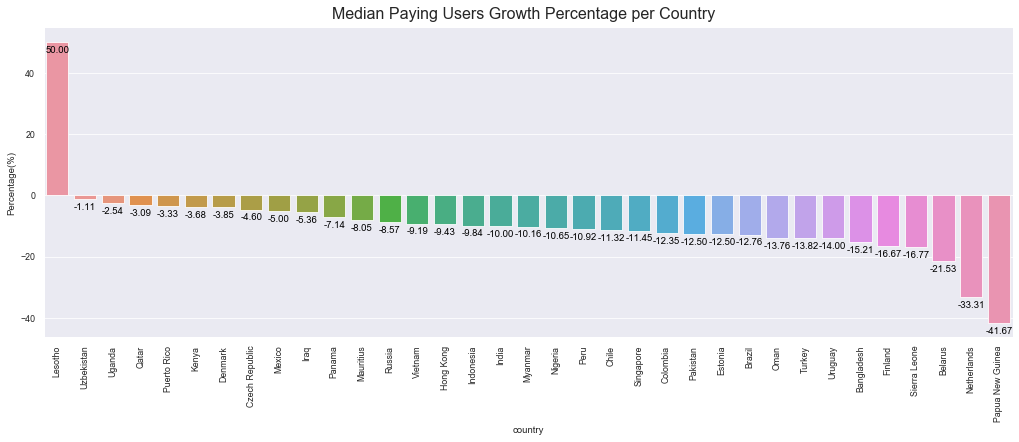

Countries with 0 growth rate:


array(['Ireland', 'Palestine', 'Nepal', 'Namibia', 'Mozambique',
       'Morocco', 'Mongolia', 'Moldova', 'Mali', 'Malaysia', 'Malawi',
       'Luxembourg', 'Libya', 'Angola', 'Lebanon', 'Latvia', 'Kuwait',
       'Kazakhstan', 'Jordan', 'Jamaica', 'Paraguay', 'Philippines',
       'Poland', 'Tanzania', 'Zambia', 'Venezuela', 'United States',
       'United Kingdom', 'United Arab Emirates', 'Ukraine', 'Tunisia',
       'Thailand', 'Taiwan', 'Romania', 'Switzerland', 'Sri Lanka',
       'South Korea', 'South Africa', 'Serbia', 'Senegal', 'Saudi Arabia',
       'Rwanda', 'Israel', 'Algeria', 'Zimbabwe', 'Croatia', 'Canada',
       'Bahrain', 'Democratic Republic of Congo', 'Benin', 'Bolivia',
       'Botswana', 'Bulgaria', 'Egypt', 'Cabo Verde', "Cote d'Ivoire",
       'Iran', 'Costa Rica', 'Cambodia', 'China', 'Ecuador',
       'Dominican Republic', 'Georgia', 'France', 'Argentina', 'Armenia',
       'Guinea-Bissau', 'Guatemala', 'Ghana', 'Azerbaijan', 'Gambia',
       'Cameroon', 'Aust

In [413]:
result = GR_C.groupby(['country'])['paying_users_g'].aggregate(np.median).reset_index().sort_values('paying_users_g',ascending=False).fillna(0)
result0 = result[result['paying_users_g'] == 0]
result = result[result['paying_users_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='country',y='paying_users_g',order=result['country'], estimator=np.median)
g.fig.set_size_inches(18,5)
# g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Paying Users Growth Percentage per Country', fontsize=16, y=1.03, x=0.5)

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-3.5, inte=False)

plt.show()

print('Countries with 0 growth rate:')
np.array(result0['country'])

#### Median Paying User Growth by Industry

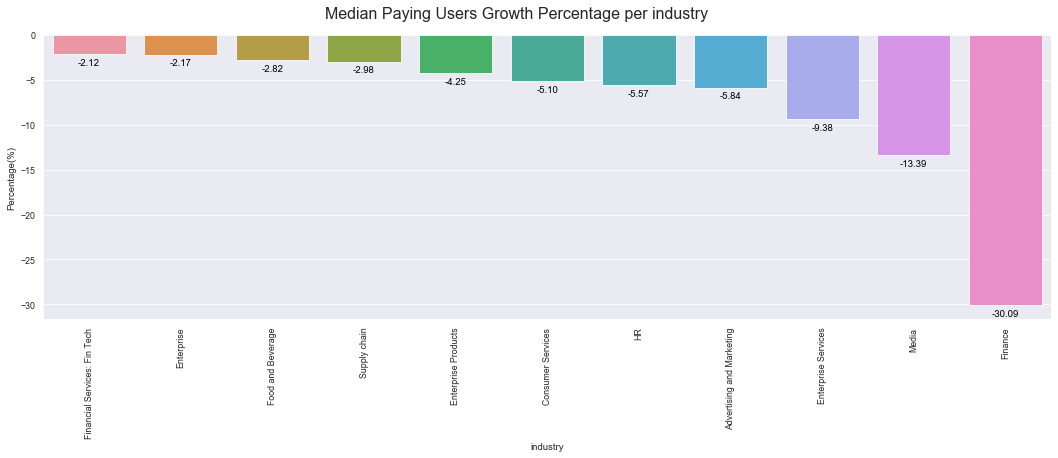

Industries with 0 growth rate:


array(['Government', 'Gaming / Entertainment', 'Health / Wellness',
       'Health: Health Tech', 'HighTech / NanoTech / Materials',
       'ICT / Telcom', 'Industrial / Energy / Clean Tech',
       'MedTech / BioTech', 'Other', 'Professional Services',
       'Real Estate', 'Retail', 'Security',
       'Social Networking and Collaboration', 'Sports', 'Tech',
       'Travel and Transport', 'Aerospace', 'Urban Development',
       'Education', 'Ecosystem enabler', 'Financial Services',
       'Agri: Agri Tech', 'Audio and Media', 'Automotive',
       'Consumer Goods', 'Education: Ed Tech', 'Consumer Products'],
      dtype=object)

In [416]:
result = GR_C.groupby(['industry'])['paying_users_g'].aggregate(np.median).reset_index().sort_values('paying_users_g',ascending=False).fillna(0)
result0 = result[result['paying_users_g'] == 0]
result = result[result['paying_users_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='industry',y='paying_users_g',order=result['industry'], estimator=np.median)
g.fig.set_size_inches(17,5)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Paying Users Growth Percentage per industry', fontsize=16, x=0.53)

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-1.2, inte=False)

plt.show()
                                                                                                     
print('Industries with 0 growth rate:')
np.array(result0['industry'])

#### Median Number of Transactions Growth by Country

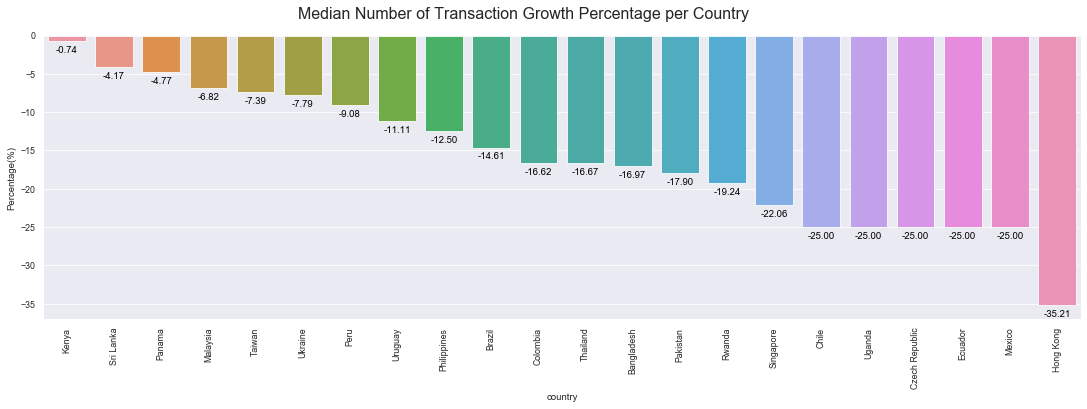

Countries with 0 growth rate:


array(['Algeria', 'Indonesia', 'Jordan', 'Lebanon', 'Mali', 'Angola',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nigeria',
       'Palestine', 'Poland', 'Russia', 'Senegal', 'Serbia',
       'South Africa', 'South Korea', 'Switzerland', 'Tanzania',
       'Tunisia', 'Turkey', 'United Arab Emirates', 'Vietnam', 'Iran',
       'Zimbabwe', 'India', "Cote d'Ivoire", 'Azerbaijan', 'Bahrain',
       'Bolivia', 'Botswana', 'Bulgaria', 'Armenia', 'China',
       'Costa Rica', 'Australia', 'Georgia', 'Ghana', 'Argentina',
       'Egypt', 'Ethiopia', 'Dominican Republic', 'Austria', 'Belarus',
       'Benin', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Croatia',
       'Democratic Republic of Congo', 'Denmark', 'Estonia', 'Fiji',
       'Finland', 'France', 'Gambia', 'Guatemala', 'Guinea-Bissau',
       'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Lesotho', 'Libya', 'Luxembourg', 'Malawi',
       'Mauritius', 'Mongolia', 'Na

In [418]:
result = GR_C.groupby(['country'])['number_transactions_g'].aggregate(np.median).reset_index().sort_values('number_transactions_g',ascending=False).fillna(0)
result0 = result[result['number_transactions_g'] == 0]
result = result[result['number_transactions_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='country',y='number_transactions_g',order=result['country'], estimator=np.median)
g.fig.set_size_inches(18,5)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Number of Transaction Growth Percentage per Country', fontsize=16, x=0.5)

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-1.5, inte=False)

plt.show()

print('Countries with 0 growth rate:')
np.array(result0['country'])

#### Median Number of Transactions Growth by Industry

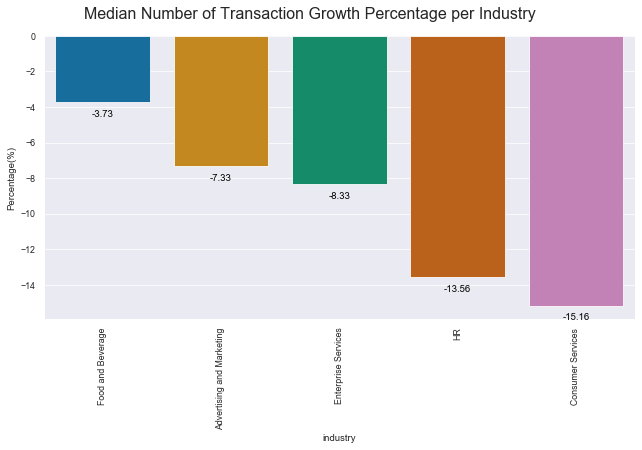

Industries with 0 growth rate:


array(['Gaming / Entertainment', 'Aerospace', 'Sports',
       'Social Networking and Collaboration', 'Security', 'Real Estate',
       'Other', 'MedTech / BioTech', 'Industrial / Energy / Clean Tech',
       'ICT / Telcom', 'HighTech / NanoTech / Materials',
       'Health / Wellness', 'Travel and Transport',
       'Financial Services: Fin Tech', 'Financial Services',
       'Enterprise Products', 'Education', 'Consumer Products',
       'Audio and Media', 'Agri: Agri Tech', 'Automotive',
       'Consumer Goods', 'Ecosystem enabler', 'Education: Ed Tech',
       'Enterprise', 'Finance', 'Government', 'Health: Health Tech',
       'Media', 'Professional Services', 'Retail', 'Supply chain', 'Tech',
       'Urban Development'], dtype=object)

In [421]:
result = GR_C.groupby(['industry'])['number_transactions_g'].aggregate(np.median).reset_index().sort_values('number_transactions_g',ascending=False).fillna(0)
result0 = result[result['number_transactions_g'] == 0]
result = result[result['number_transactions_g'] != 0]

g = sns.catplot(data=result,kind='bar',x='industry',y='number_transactions_g',order=result['industry'], estimator=np.median)
g.fig.set_size_inches(10,5)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Median Number of Transaction Growth Percentage per Industry', fontsize=16, x=0.5)

plt.xticks(rotation=90)
plt.ylabel('Percentage(%)')

show_values_on_bars(g.fig.axes[0], h_v="v", space=-0.8, inte=False)

plt.show()

print('Industries with 0 growth rate:')
np.array(result0['industry'])

## Business Stage

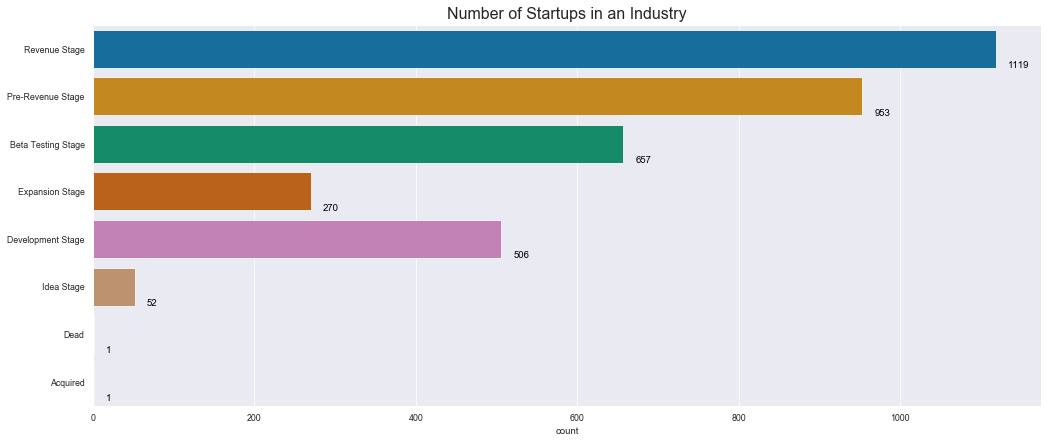

In [309]:
fig, ax = plt.subplots(figsize=(17,7))
sns.countplot(y='business_stage',data=df,ax=ax)

show_values_on_bars(ax, h_v="h", space=15, inte=True)

plt.title('Number of Startups in an Industry',fontsize=16)
plt.ylabel(None)
plt.show()

In [372]:
def show_values_on_bars(axs, h_v="h", space=0.4,inte=False,color='Black',fontsize=None,rotation=0):
    def _show_on_single_plot(ax):
        if h_v == "v":
            if inte == False:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + float(space)
                    value = '{:.2f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center", color=color, fontsize=fontsize, rotation=rotation)
            else:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + float(space)
                    value = int(p.get_height())
                    ax.text(_x, _y, value, ha="center", color=color, fontsize=fontsize, rotation=rotation)
        elif h_v == "h":
            if inte == False:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height()
                    value = '{:.2f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left", color=color, fontsize=fontsize, rotation=rotation)
            else:
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height()
                    value = int(p.get_width())
                    ax.text(_x, _y, value, ha="left", color=color, fontsize=fontsize, rotation=rotation)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

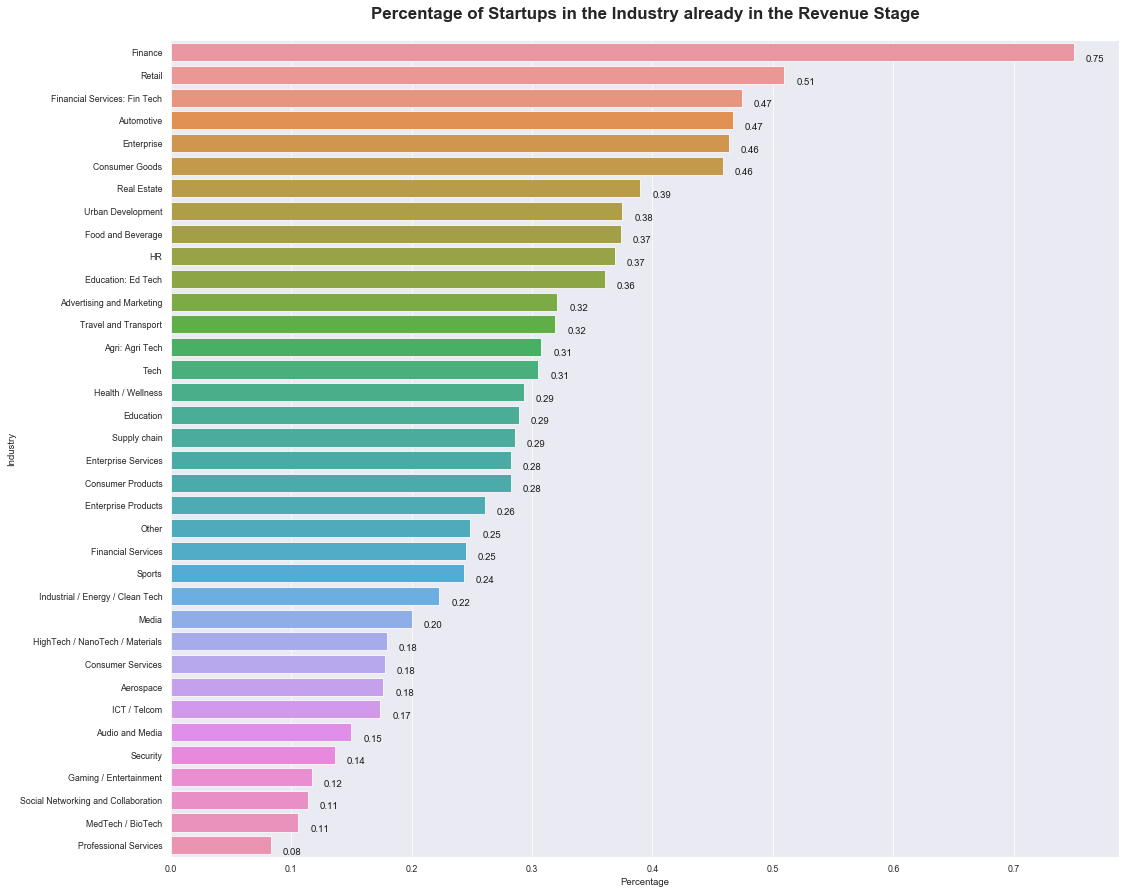

In [292]:
num = df[df['business_stage'] == 'Revenue Stage']['industry'].value_counts()
denom = df['industry'].value_counts()
denom = denom[num.index]
frac = num.values/denom.values

indus = pd.DataFrame()
indus['Industry'] = num.index
indus['Percentage'] = frac

indus = indus.sort_values('Percentage',ascending=False)

fig, ax = plt.subplots(figsize=(17,15))

sns.set_color_codes("pastel")
sns.barplot(x='Percentage', y='Industry', data=indus, label='Industry',ax=ax)

show_values_on_bars(ax, h_v="h", space=0.01)

plt.title('Percentage of Startups in the Industry already in the Revenue Stage', fontsize=17, y=1.02, fontweight='bold')
sns.despine(left=True, bottom=True)

plt.show()

## Incorporation Date

Let's create a time series of startup incorporation

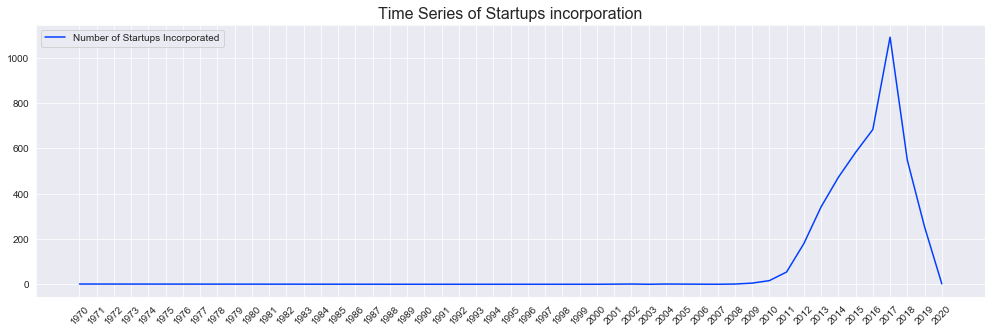


The year with Startup incorporation peak is  2017.0


In [353]:
inc_count = df['incorporation_date'].value_counts()

fig, ax = plt.subplots(figsize=(17, 5))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.lineplot(y=inc_count.values,x=inc_count.index,ax=ax,label='Number of Startups Incorporated')
plt.title('Time Series of Startups incorporation',fontsize=16)
plt.xticks(np.arange(min(inc_count.index), max(inc_count.index)+1, 1.0),rotation=45)
plt.show()

print('\nThe year with Startup incorporation peak is ', inc_count.sort_values(ascending=False).index[0])

<br/>

## Age today

Let's see which industries has the highest median age of startups
<!-- The data has some outliers. Most of the Startups has `2` employees (Mode) -->

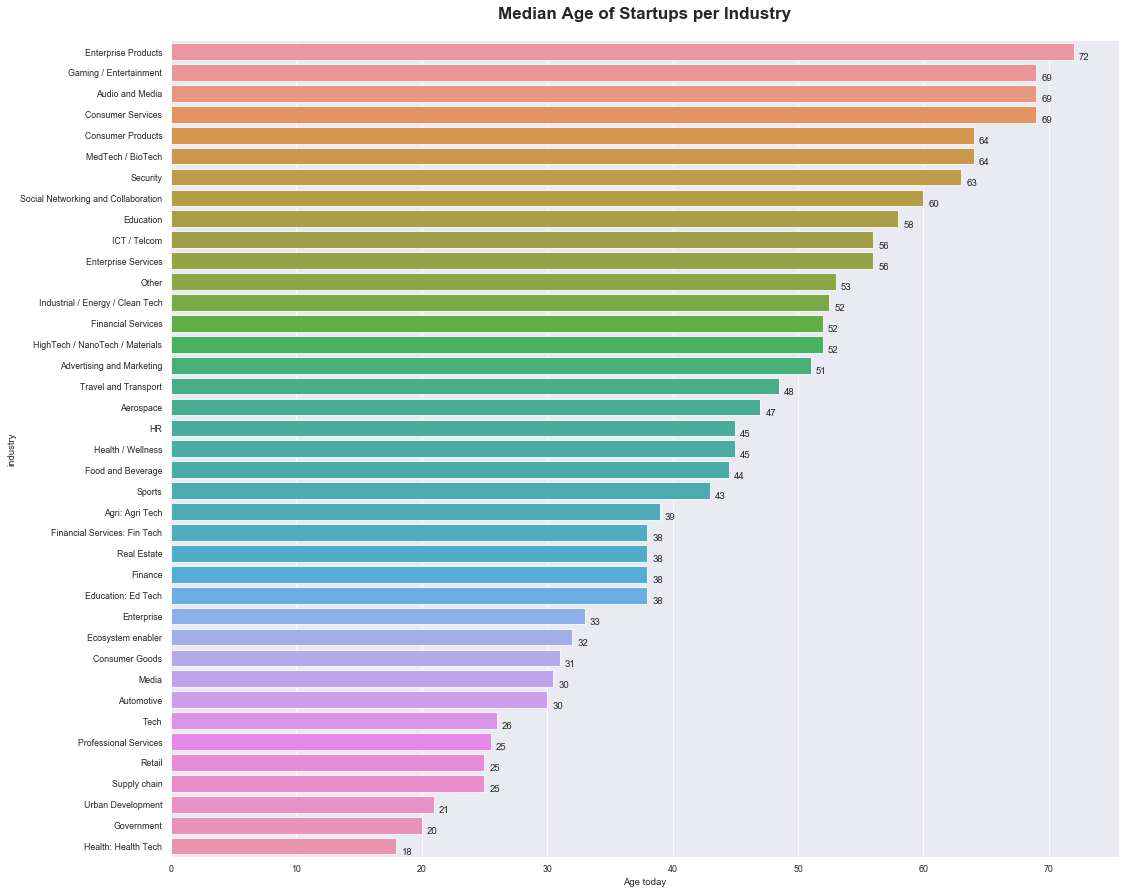

In [257]:
result = df.groupby(['industry'])['Age today'].aggregate(np.median).reset_index().sort_values('Age today',ascending=False).dropna()

fig, ax = plt.subplots(figsize=(17,15))

sns.set_color_codes("pastel")
sns.barplot(x='Age today', y='industry', data=result, label='Industry',ax=ax)

show_values_on_bars(ax, h_v="h", space=0.4, inte=True)

plt.title('Median Age of Startups per Industry', fontsize=17, y=1.02, fontweight='bold')
sns.despine(left=True, bottom=True)

plt.show()

<br/>

## Number of Employees

The data has some outliers. Most of the Startups has `2` employees (Mode)

In [176]:
df['number_employees'].describe()
num_emp_cln = df[df['number_employees']<df['number_employees'].std()*3]['number_employees']
num_emp_cln = num_emp_cln.apply(lambda x: int(x))

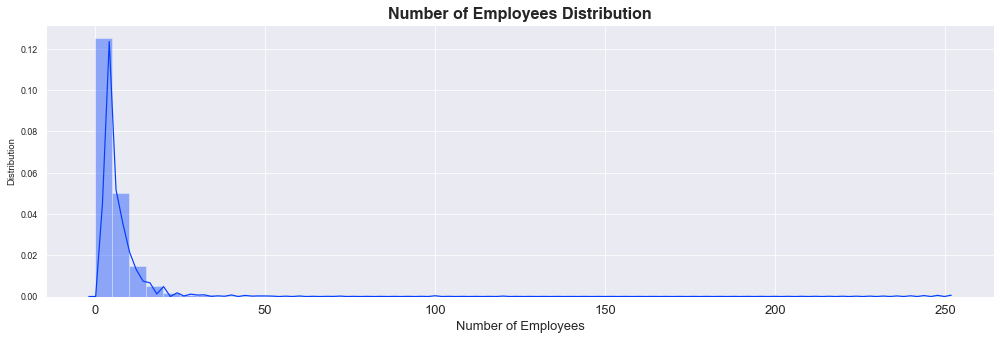

Most of the Startups in the Dataset has 2 employees


In [179]:
fig, ax0 = plt.subplots(figsize=(17, 5))
sns.set_palette('colorblind')
sns.set_context('paper')

sns.distplot(num_emp_cln, ax=ax0,kde=True)
ax0.set(ylabel='Distribution')
ax0.set_title(label='Number of Employees Distribution',fontsize=16,fontname='helvetica',fontweight='bold')

plt.xticks(fontsize=13)
plt.xlabel('Number of Employees', fontsize=13)

plt.show()
print('Most of the Startups in the Dataset has ' + str(num_emp_cln.mode()[0]) + ' employees')

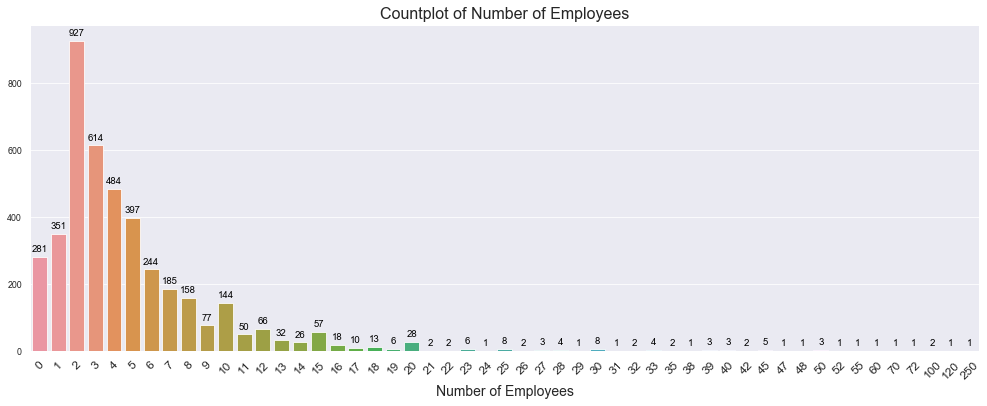

In [267]:
fig, ax = plt.subplots(figsize=(17,6))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.barplot(x=num_emp_cln.value_counts().index,y=num_emp_cln.value_counts().values,ax=ax,order=num_emp_cln.value_counts().sort_index().index)

show_values_on_bars(ax, h_v="v", space=15, inte=True)

plt.title('Countplot of Number of Employees',fontsize=16)
plt.xlabel('Number of Employees', fontsize=14)
plt.xticks(rotation=45,fontsize=12)

plt.show()

## Average Age of Founder

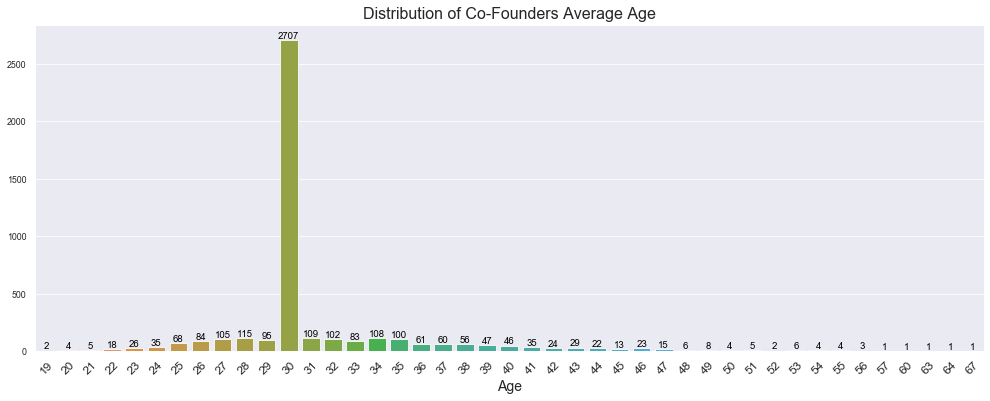

In [268]:
tempo = df['avg_age_of_entrepreneur'].apply(lambda x: int(x))

fig, ax = plt.subplots(figsize=(17,6))
sns.set_palette('colorblind')
sns.set_style('darkgrid')

sns.barplot(x=tempo.value_counts().index,y=tempo.value_counts().values,ax=ax,order=tempo.value_counts().sort_index().index)

show_values_on_bars(ax, h_v="v", space=15, inte=True)

plt.title('Distribution of Co-Founders Average Age',fontsize=16)

plt.xlabel('Age', fontsize=14)
plt.xticks(rotation=45,fontsize=12)

plt.show()

It seems that most of the Co-Founders' average age is 30 years old

<br/>

## Total Funding

The data has some outliers. Most of the Startups has `2` employees (Mode)

In [324]:
tot_fun_cln = df[df['Total Funding']<df['Total Funding'].std()*3]['Total Funding']
tot_fun_cln = tot_fun_cln.apply(lambda x: int(x))

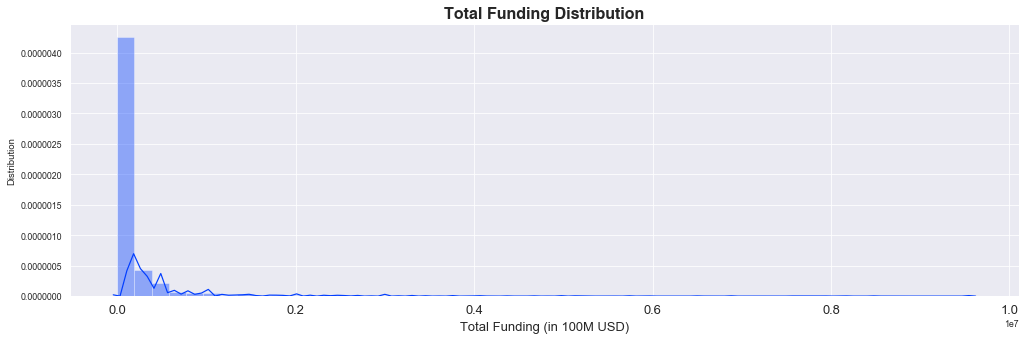

In [332]:
fig, ax0 = plt.subplots(figsize=(17, 5))
sns.set_palette('colorblind')
sns.set_context('paper')

sns.distplot(tot_fun_cln, ax=ax0,kde=True)
ax0.set(ylabel='Distribution')
ax0.set_title(label='Total Funding Distribution',fontsize=16,fontname='helvetica',fontweight='bold')

plt.xticks(fontsize=13)
plt.xlabel('Total Funding (in 100M USD)', fontsize=13)

plt.show()

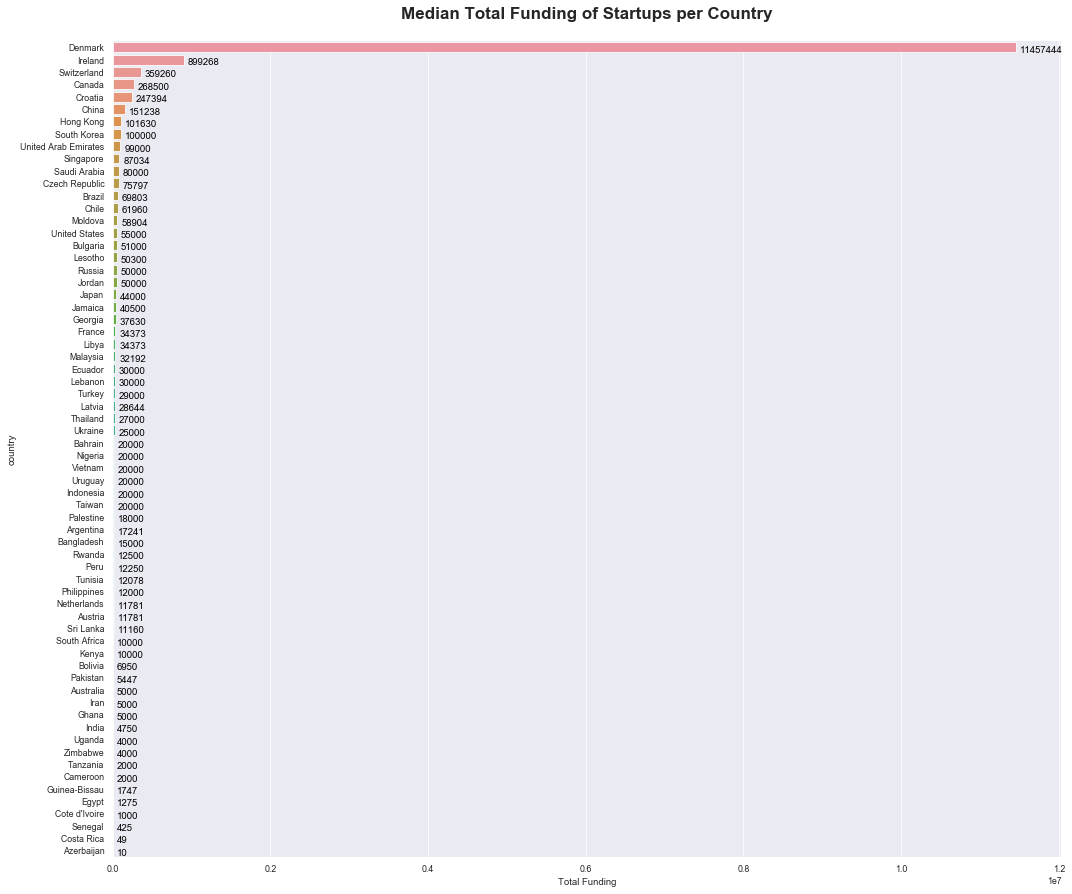

Countries with a median of 0 Total Funding:


array(['Malawi', 'Serbia', 'Sierra Leone', 'Ethiopia', 'Estonia',
       'Dominican Republic', 'Democratic Republic of Congo', 'Colombia',
       'Finland', 'Cambodia', 'Cabo Verde', 'Botswana', 'United Kingdom',
       'Belarus', 'Uzbekistan', 'Venezuela', 'Armenia', 'Zambia', 'Fiji',
       'Gambia', 'Luxembourg', 'Kuwait', 'Mali', 'Mauritius', 'Mexico',
       'Angola', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Kazakhstan', 'Romania', 'Oman', 'Israel',
       'Iraq', 'Panama', 'Papua New Guinea', 'Paraguay', 'Guatemala',
       'Poland', 'Puerto Rico', 'Qatar', 'Algeria'], dtype=object)

In [349]:
result = df.groupby(['country'])['Total Funding'].aggregate(np.median).reset_index().sort_values('Total Funding',ascending=False).dropna()
res0 = result[result['Total Funding'] == 0]
res = result[result['Total Funding'] != 0]

fig, ax = plt.subplots(figsize=(17,15))

sns.set_color_codes("pastel")
sns.barplot(x='Total Funding', y='country', data=res, label='Country',ax=ax)

show_values_on_bars(ax, h_v="h", space=50000, inte=True)

plt.title('Median Total Funding of Startups per Country', fontsize=17, y=1.02, fontweight='bold')
sns.despine(left=True, bottom=True)

plt.show()

print('Countries with a median of 0 Total Funding:')
np.array(res0['country'])

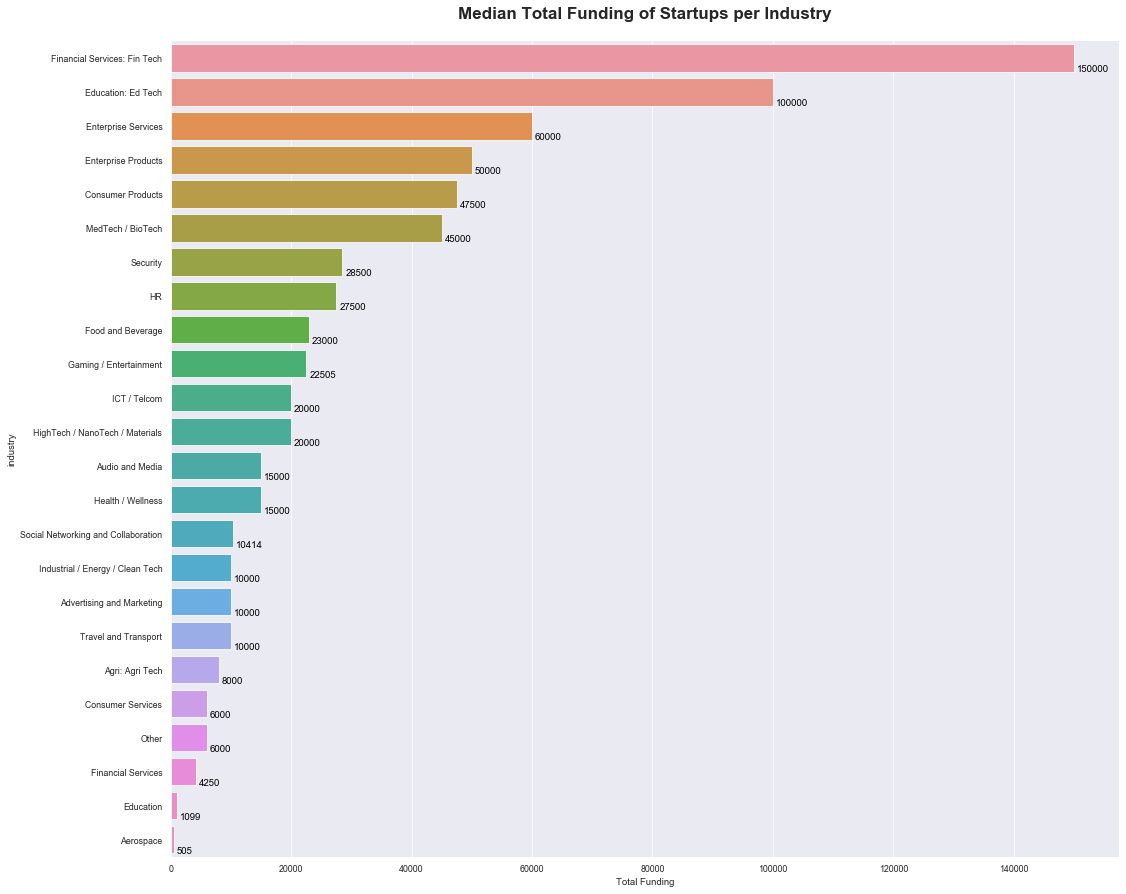

Industries with a median of 0 Total Funding:


array(['Real Estate', 'Sports', 'Supply chain', 'Tech', 'Retail',
       'Government', 'Professional Services', 'Media',
       'Health: Health Tech', 'Finance', 'Enterprise',
       'Ecosystem enabler', 'Consumer Goods', 'Automotive',
       'Urban Development'], dtype=object)

In [346]:
result = df.groupby(['industry'])['Total Funding'].aggregate(np.median).reset_index().sort_values('Total Funding',ascending=False).dropna()
res0 = result[result['Total Funding'] == 0]
res = result[result['Total Funding'] != 0]

fig, ax = plt.subplots(figsize=(17,15))

sns.set_color_codes("pastel")
sns.barplot(x='Total Funding', y='industry', data=res, label='Industry',ax=ax)

show_values_on_bars(ax, h_v="h", space=500, inte=True)

plt.title('Median Total Funding of Startups per Industry', fontsize=17, y=1.02, fontweight='bold')
sns.despine(left=True, bottom=True)

plt.show()

print('Industries with a median of 0 Total Funding:')
np.array(res0['industry'])

In [342]:
df[df['industry'] == 'Finance']['revenue_1month']

company_id
3065    15000.0
3132     9858.0
3838     1500.0
4128     2500.0
Name: revenue_1month, dtype: float64

<br/>


## Revenue Model
Let's create a new column: the total number of revenue models a startup has called `total_rev_model`

We're only looking at the distribution so let's use the non-imputed columns to get a more accurate representation

In [270]:
rev = df[['revenue_model_commission','revenue_model_product',
    'revenue_model_on-demand','revenue_model_subscription',
    'revenue_model_freemium', 'revenue_model_advertising',
    'revenue_model_licensing']]
total_rev_model = []
for row in rev.values:
    total_rev_model.append(row.sum())
rev['total_rev_model'] = total_rev_model
rev.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,total_rev_model
company_id,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Let's create a countplot of `total_rev_model` the total number of revenue models a startup has
It seems that most of the startups has a total number of revenue models of either 1 or 2

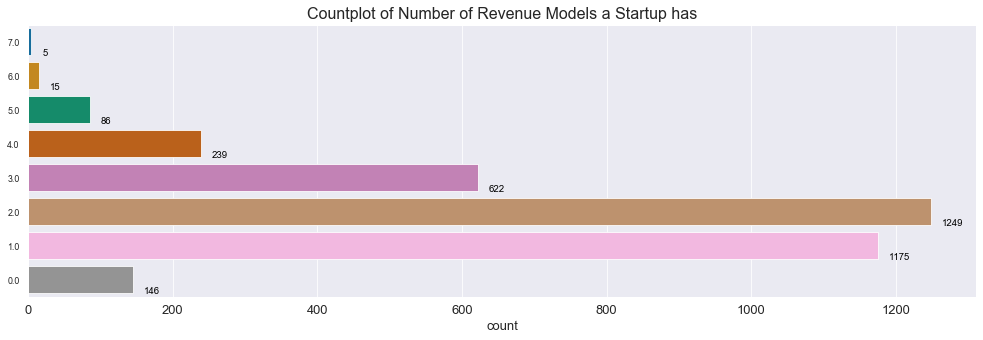

In [284]:
fig, ax = plt.subplots(figsize=(17,5))

rev_count = rev.total_rev_model.value_counts().sort_index(ascending=False)

sns.set_color_codes("pastel")
sns.countplot(y='total_rev_model',data=rev,ax=ax,order=rev_count.index)

show_values_on_bars(ax, h_v="h", space=15, inte=True)

plt.title('Countplot of Number of Revenue Models a Startup has', fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel('count',fontsize=13)
plt.ylabel(None)
plt.show()

#### Let's create a countplot of different revenue models
It seems that Subscription and Product are the most common revenue model used

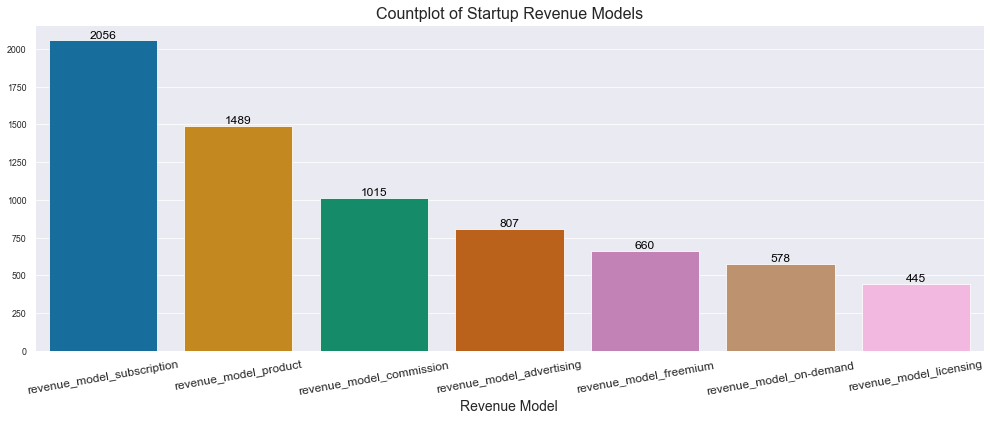

In [285]:
fig, ax = plt.subplots(figsize=(17,6))
rev_model_count = rev.iloc[:,:-1].sum()

sns.set_color_codes("pastel")
sns.barplot(x=rev_model_count.index,y=rev_model_count.values,ax=ax,order=rev_model_count.sort_values(ascending=False).index)

show_values_on_bars(ax, h_v="v", space=15, inte=True, fontsize=12)

plt.title('Countplot of Startup Revenue Models',fontsize=16)

plt.xlabel('Revenue Model', fontsize=14)
plt.xticks(rotation=10,fontsize=12)

plt.show()

#### Here is some further breakdown of individual revenue models from Samruddhi's Kaggle Notebook
Minor changes: used non-imputed data (to reflect a more accurate distribution)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


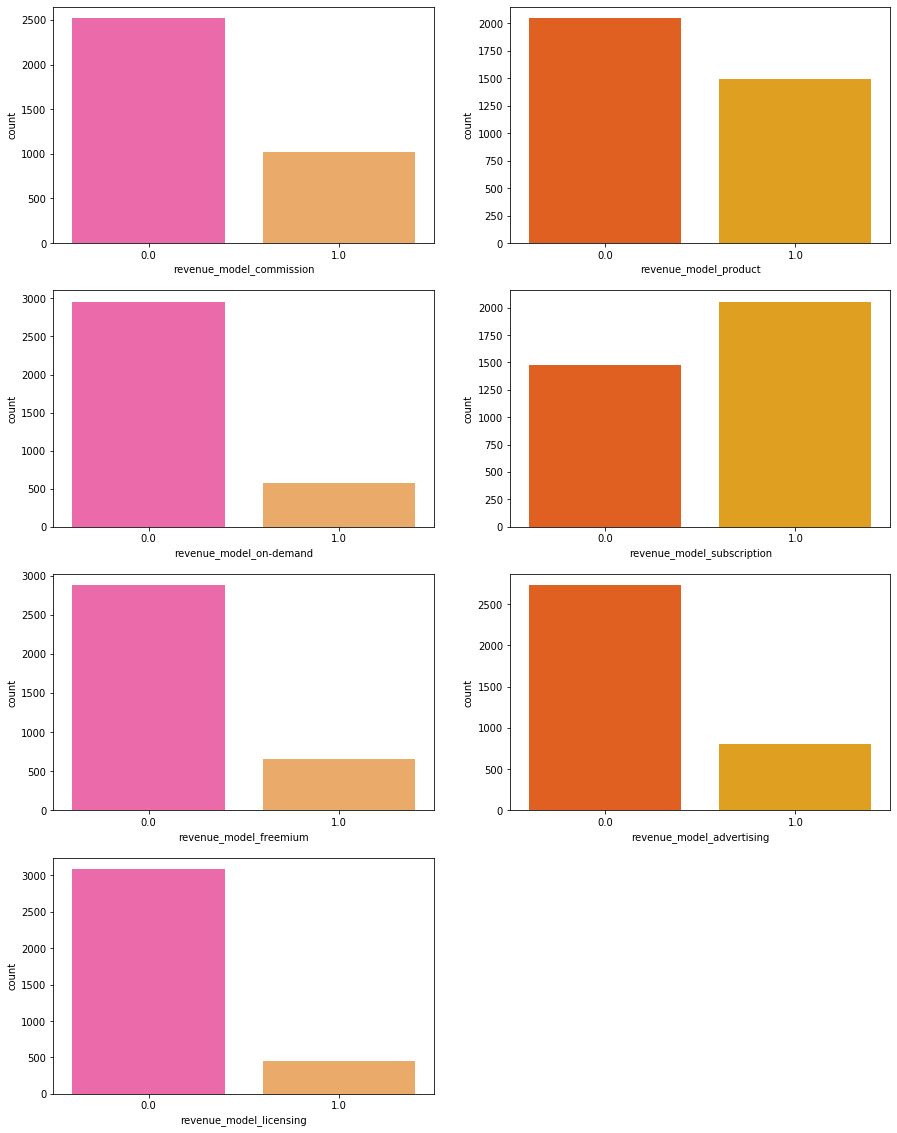

In [285]:
fig, ax = plt.subplots(4,2, figsize = (15,20))
labels = ['revenue_model_commission','revenue_model_product','revenue_model_on-demand',
          'revenue_model_subscription','revenue_model_freemium','revenue_model_advertising',
          'revenue_model_licensing']


sns.countplot(x=df['revenue_model_commission'], palette='spring',ax=ax[0][0])
sns.countplot(x=df['revenue_model_product'], palette='autumn',ax=ax[0][1])
sns.countplot(x=df['revenue_model_on-demand'],palette='spring', ax=ax[1][0])
sns.countplot(x=df['revenue_model_subscription'],palette='autumn', ax=ax[1][1])
sns.countplot(x=df['revenue_model_freemium'],palette='spring',ax=ax[2][0])
sns.countplot(x=df['revenue_model_advertising'],palette='autumn', ax=ax[2][1])
sns.countplot(x=df['revenue_model_licensing'], palette='spring',ax=ax[3][0])
fig.delaxes(ax[3,1])
fig.show()

<br/>



## Customer Types
Let's create a new column: the total number of customer types a startup has called `total_cus_type`

In [287]:
cus = df[['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G']]
total_cus_type = []
for row in cus.values:
    total_cus_type.append(row.sum())
cus['total_cus_type'] = total_cus_type

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Let's create a countplot of `total_cus_type` the total number of customer types a startup has
It seems that most of the startups has a total number of either 1 or 2 customer types

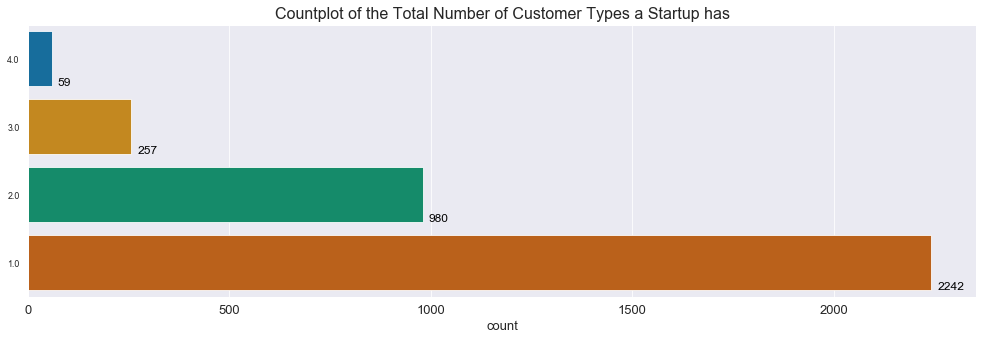

In [289]:
fig, ax = plt.subplots(figsize=(17,5))

cus_count = cus.total_cus_type.value_counts().sort_index(ascending=False)

sns.set_color_codes("pastel")
sns.countplot(y='total_cus_type',data=cus,ax=ax,order=cus_count.index)

show_values_on_bars(ax, h_v="h", space=15, inte=True, fontsize=12)

plt.title('Countplot of the Total Number of Customer Types a Startup has',fontsize=16)

plt.xlabel('count',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(None)

plt.show()

Bar plot of customer types. B2B seems to be the most frequent then followed by B2C

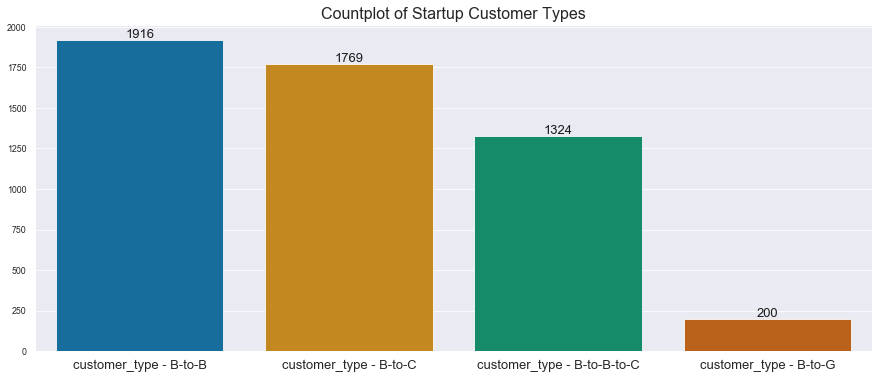

In [299]:
fig, ax = plt.subplots(figsize=(15,6))
cus_type_count = cus.iloc[:,:-1].sum()
sns.barplot(x=cus_type_count.index,y=cus_type_count.values,ax=ax,order=cus_type_count.sort_values(ascending=False).index)
show_values_on_bars(ax, h_v="v", space=15, inte=True, fontsize=13, color='k')

plt.xticks(fontsize=13)
plt.title('Countplot of Startup Customer Types',fontsize=16)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



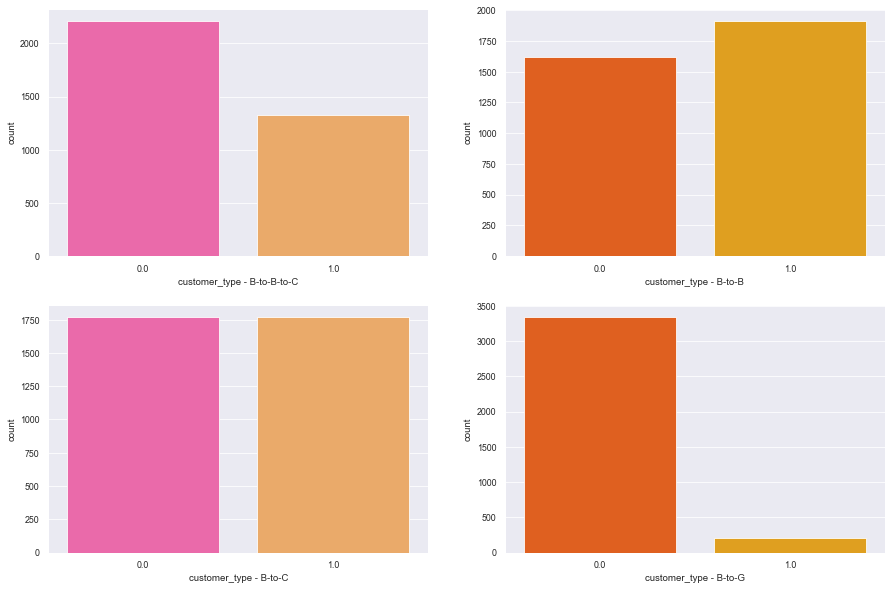

In [715]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
labels = ['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G']


sns.countplot(x=df['customer_type - B-to-B-to-C'], palette='spring',ax=ax[0][0])
sns.countplot(x=df['customer_type - B-to-B'], palette='autumn',ax=ax[0][1])
sns.countplot(x=df['customer_type - B-to-C'],palette='spring', ax=ax[1][0])
sns.countplot(x=df['customer_type - B-to-G'],palette='autumn', ax=ax[1][1])

fig.show()

<br/>



## Customer Interaction

In [294]:
#Create new column of total number of customer interation types a startup has
ci = df[['customer_interaction - web', 'customer_interaction - mobile', 'customer_interaction - physical']]
total_cus_int = []
for row in ci.values:
    total_cus_int.append(row.sum())
ci['total_cus_int'] = total_cus_int

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



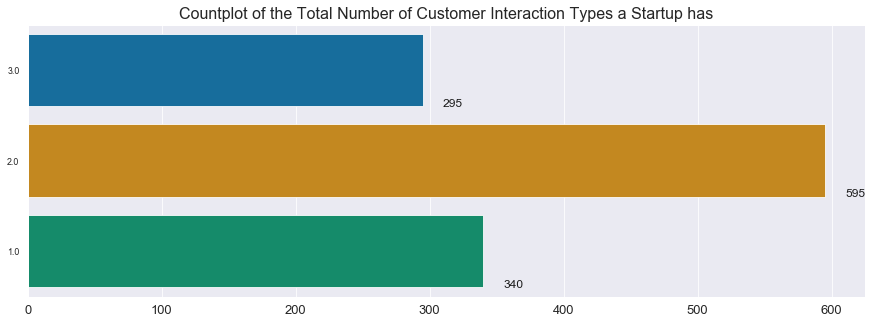

In [297]:
fig, ax = plt.subplots(figsize=(15,5))
ci_count = ci.total_cus_int.value_counts().sort_index(ascending=False)
sns.countplot(y='total_cus_int',data=ci,ax=ax,order=ci_count.index)

show_values_on_bars(ax, h_v="h", space=15, inte=True, fontsize=12, color='k')

plt.title('Countplot of the Total Number of Customer Interaction Types a Startup has',fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

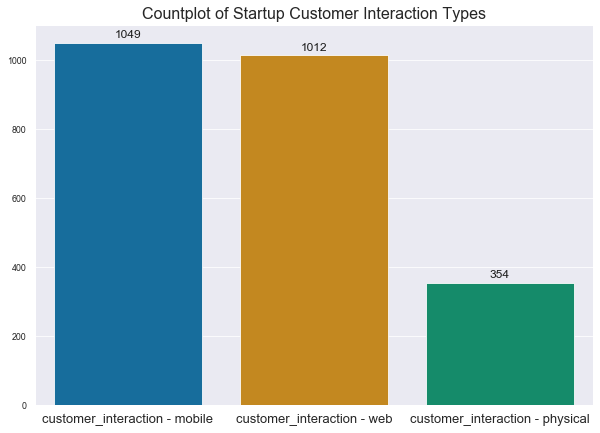

In [304]:
fig, ax = plt.subplots(figsize=(10,7))
cus_int_count = ci.iloc[:,:-1].sum()
sns.barplot(x=cus_int_count.index,y=cus_int_count.values,ax=ax,order=cus_int_count.sort_values(ascending=False).index)

show_values_on_bars(ax, h_v="v", space=15, inte=True, fontsize=12, color='k')

plt.xticks(rotation=0,fontsize=13)
plt.title('Countplot of Startup Customer Interaction Types',fontsize=16)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



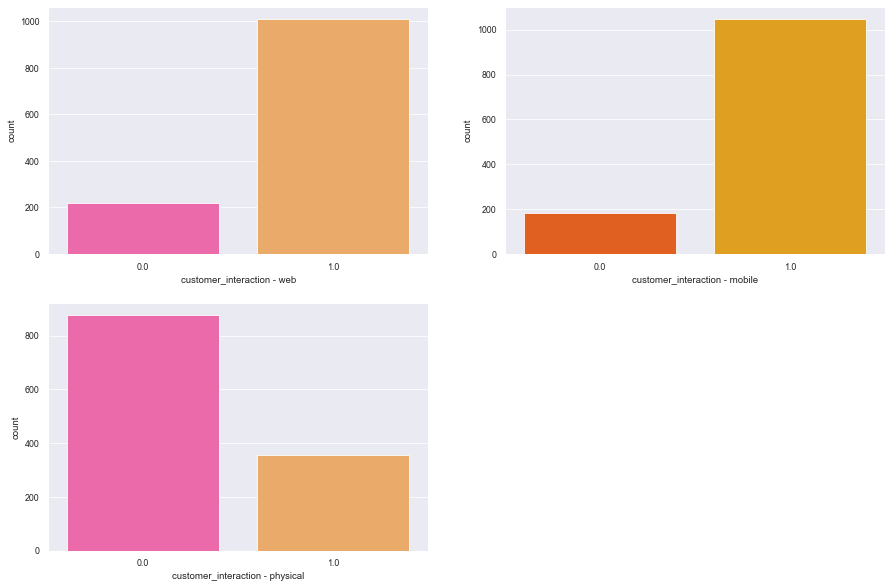

In [874]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
labels = ['customer_interaction - web', 'customer_interaction - mobile', 'customer_interaction - physical']


sns.countplot(x=df['customer_interaction - web'], palette='spring',ax=ax[0][0])
sns.countplot(x=df['customer_interaction - mobile'], palette='autumn',ax=ax[0][1])
sns.countplot(x=df['customer_interaction - physical'],palette='spring', ax=ax[1][0])

fig.delaxes(ax[1,1])
fig.show()

## Website Dead

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



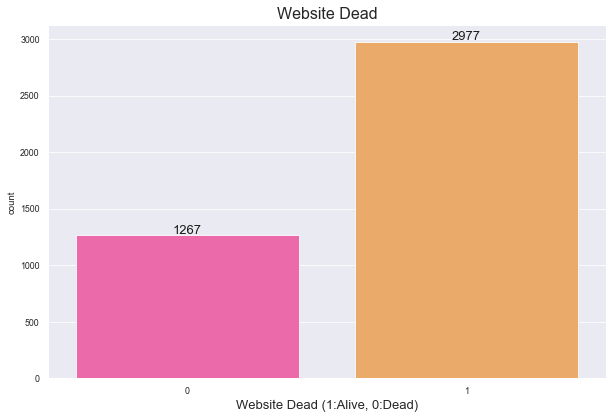

In [306]:
fig, ax = plt.subplots(figsize = (10,6.5))

sns.countplot(x=df['website_dead_decode'], palette='spring',ax=ax)

show_values_on_bars(ax, h_v="v", space=15, inte=True, fontsize=13, color='k')

plt.xlabel('Website Dead (1:Alive, 0:Dead)', fontsize=13)
plt.title('Website Dead',fontsize=16)

fig.show()